In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [9]:
df=pd.read_csv('data_car.txt', delimiter=';', usecols=(0,1), header=None) #Import the file, now the column names are 0 and 1
df.rename(columns={0:'BK_hospitalization',1:'Car'},inplace=True) #Change column name
df.head()#Display the first five lines

,BK_hospitalization,Car
0,364,9
1,418,3
2,487,8
3,464,4
4,399,6


In [10]:
df.describe()#Do descriptive statistics on the data first

,BK_hospitalization,Car
count,65.000000,65.000000
mean,170.000000,4.138462
std,145.336248,2.714987
min,18.000000,0.000000
25%,84.000000,2.000000
50%,106.000000,4.000000
75%,221.000000,5.000000
max,560.000000,11.000000


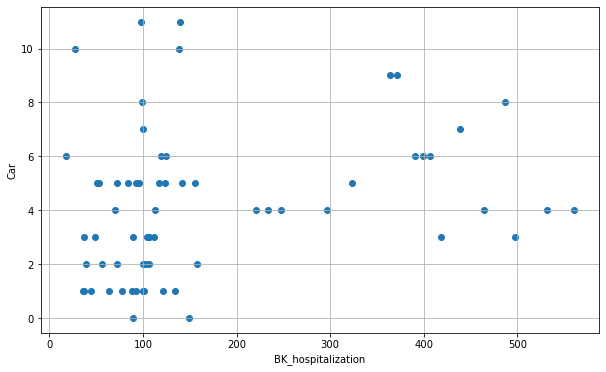

In [11]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(df['BK_hospitalization'],df['Car'])

# Set the chart title and label the axis
plt.xlabel('BK_hospitalization')
plt.ylabel('Car')
plt.show()

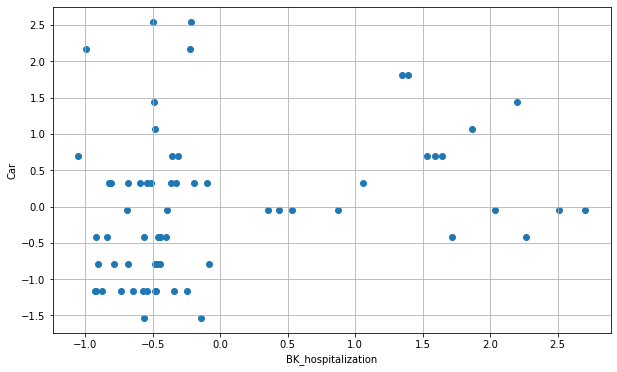

In [12]:
#Standardize the above data using StandardScaler

from sklearn.preprocessing import StandardScaler

X=df['BK_hospitalization'].values.reshape(-1, 1)
y=df['Car'].values.reshape(-1, 1)

ss_x=StandardScaler()
ss_y=StandardScaler()
X_ss=ss_x.fit_transform(X)
y_ss=ss_y.fit_transform(y)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(X_ss,y_ss)

plt.xlabel('BK_hospitalization')
plt.ylabel('Car')
plt.show()

In [15]:
X_ss = X_ss.reshape(-1)
y_ss = y_ss.reshape(-1)
dict_ss={"BK_hospitalization_ss" : X_ss,
   "Car_ss" : y_ss}
df_ss= pd.DataFrame(dict_ss)
df_ss #show the dataframe after the standardization

,BK_hospitalization_ss,Car_ss
0,1.345224,1.804566
1,1.719667,-0.422588
2,2.198123,1.433373
3,2.038638,-0.051396
4,1.587919,0.690989
...,...,...
60,-0.596336,0.319796
61,-0.478456,-1.164973
62,-0.464588,-0.793780
63,-0.561666,-1.536165


In [16]:
def computeCost(x,y,theta):
    inner = np.sum(np.power((x*theta-y),2))
    return inner/(2*len(x)) #Define cost function

In [17]:

# Because theta is a 2*1-dimensional vector and x is a len(x) * 1-dimensional vector, in order to be able to perform calculations, add a column before the 0th column in x, the value of which is all 1, so that x becomes len(x ) *2-dimensional matrix. At this time x * theta is the hypothetical function.

df_ss.insert(0,'ones',1)#It means to add a column before the 0th column of df, the name of the column is'one', and its value is all 1
df_ss.head()

,ones,BK_hospitalization_ss,Car_ss
0,1,1.345224,1.804566
1,1,1.719667,-0.422588
2,1,2.198123,1.433373
3,1,2.038638,-0.051396
4,1,1.587919,0.690989


In [18]:
# Define input variables and output variables and parameters
x=df_ss.loc[:,['ones','BK_hospitalization_ss']]
y=df_ss.loc[:,'Car_ss']
X=np.matrix(x.values)
y=np.matrix(y.values) 
theta=np.matrix([0,0])

In [19]:
y=y.T  #Reverse transpose
theta=theta.T

In [20]:
computeCost(X,y,theta)#First calculate the initial cost function

0.4999999999999999

In [21]:
#Define the gradient descent algorithm
def gradientDescent(x,y,theta,alpha,iters):#alpha is the learning rate, iters is the number of iterations
    temp = np.matrix(np.zeros(theta.shape))#initialization
    cost = np.zeros(iters) 
    for i in range(iters):
        temp = theta - ((alpha/len(x))*(x*theta-y).T *x).T #Use the form of a vector
        theta = temp  # Update at the same time
        cost[i]=computeCost(x,y,theta)
   
    return theta,cost

In [22]:
alpha=0.01
iters=1000

In [23]:
finally_theta,cost=gradientDescent(X,y,theta,alpha,iters)
finally_theta

matrix([[-1.39225111e-16],
        [ 2.59833905e-01]])

In [24]:
computeCost(X,y,finally_theta)#Calculate the cost function of the training model with the parameters obtained by the fitting

0.4662402561199856

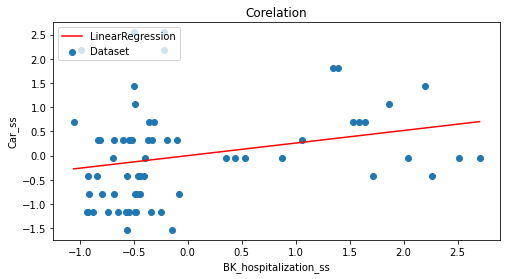

In [25]:
x=np.linspace(df_ss['BK_hospitalization_ss'].min(),df_ss['BK_hospitalization_ss'].max(),100)#Select the minimum and maximum values in a column, and generate 100 numbers at equal intervals between these two values
f=finally_theta[0,0]+finally_theta[1,0]*x 
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(x,f,'r',label='LinearRegression')
ax.scatter(df_ss['BK_hospitalization_ss'],df_ss['Car_ss'],label='Dataset')
ax.legend(loc=2)
ax.set_xlabel('BK_hospitalization_ss')
ax.set_ylabel('Car_ss')
ax.set_title('Corelation')
plt.show()

Text(0.5, 1.0, 'GredientDecent')

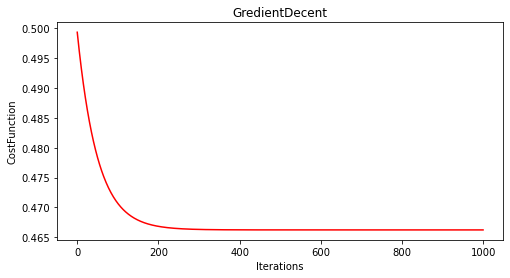

In [26]:
x=np.arange(1000)
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(x,cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('CostFunction')
ax.set_title('GredientDecent')